In [89]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("Final_project_data.csv")

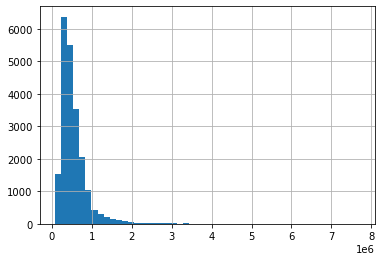

In [91]:
df.price.hist(bins=50)

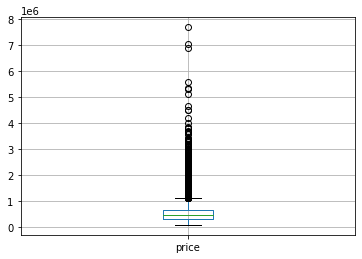

In [92]:
df.boxplot('price')

In [93]:
len(df.price > 1000000)

21613

In [94]:
df.price[df.price > 1000000 ].count() / len(df.price)

0.06755193633461343

In [95]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'num'],
      dtype='object')

In [96]:
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'num'], inplace=True)
from sklearn.linear_model import LinearRegression
y = df.pop('price')
X = df

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [99]:
mlr = LinearRegression().fit(X_train, y_train)

In [100]:
mlr.score(X_test, y_test)

0.6628397700771711

In [102]:
from sklearn.linear_model import LogisticRegression
import numpy as np
mil_train = np.where(y_train <= 999999, 0, 1)
clf = LogisticRegression().fit(X_train, mil_train)
mil_test = np.where(y_test <= 999999, 0, 1)
clf.score(X_test, mil_test)

0.9504935225169648

In [104]:
from sklearn.metrics import classification_report
mil_pred = clf.predict(X_test)
print(classification_report(mil_test, mil_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6021
           1       0.76      0.44      0.56       463

    accuracy                           0.95      6484
   macro avg       0.86      0.72      0.77      6484
weighted avg       0.94      0.95      0.94      6484

